In [2]:
import os

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
import pandas as pd

from kmodes.kmodes import KModes
from scipy.spatial.distance import cdist
from yellowbrick.cluster import silhouette_visualizer

## Importanto database - penguin

In [3]:
from settings import PATH, DATABASE_PATH


csv = "penguins_size.csv"

In [4]:
df = pd.read_csv(os.path.join(DATABASE_PATH, csv))
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.replace('.', float('NAN'), inplace=True)
df = df.dropna(how="all")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df.count()

species              344
island               344
culmen_length_mm     342
culmen_depth_mm      342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

In [ ]:
df.describe(include='all')

In [7]:
#study_name = df.studyName
#sample_number = df.Sample_Number
#region = df.Region
#stage = df.Stage
species = df.species
island = df.island
culmen_length_mm = df.culmen_length_mm
culmen_depth_mm = df.culmen_depth_mm
flipper_length_mm = df.flipper_length_mm
body_mass_g = df.body_mass_g
sex = df.sex

In [8]:
df.cov()

ValueError: could not convert string to float: 'Adelie'

In [9]:
sex.unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [10]:
island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### Quantidade de Pinguins por especie

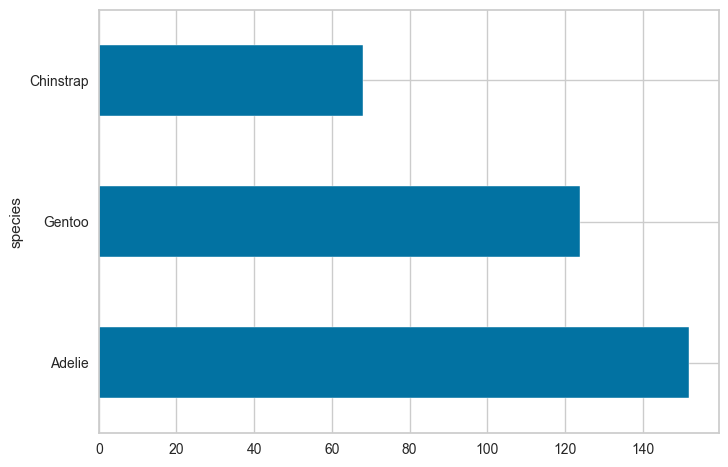

In [21]:
species.value_counts().plot(kind='barh')
plt.show()

### Quantidade de Pinguins por ilhas

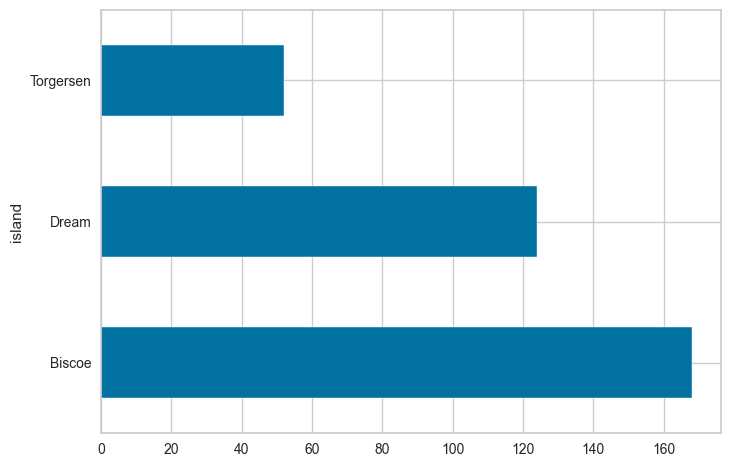

In [22]:
island.value_counts().plot(kind='barh')
plt.show()

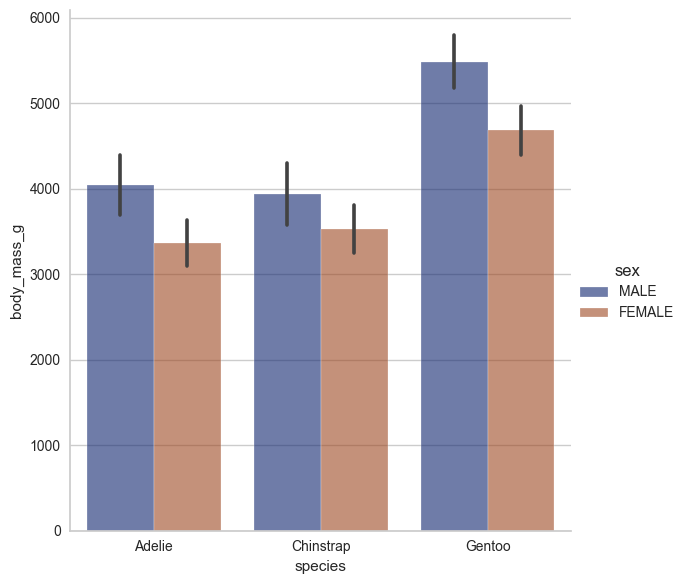

In [13]:
sns.catplot(kind="bar", x=species, y=body_mass_g, hue=sex, errorbar="sd", palette="dark", alpha=.6, height=6)

<Axes: xlabel='species', ylabel='culmen_length_mm'>

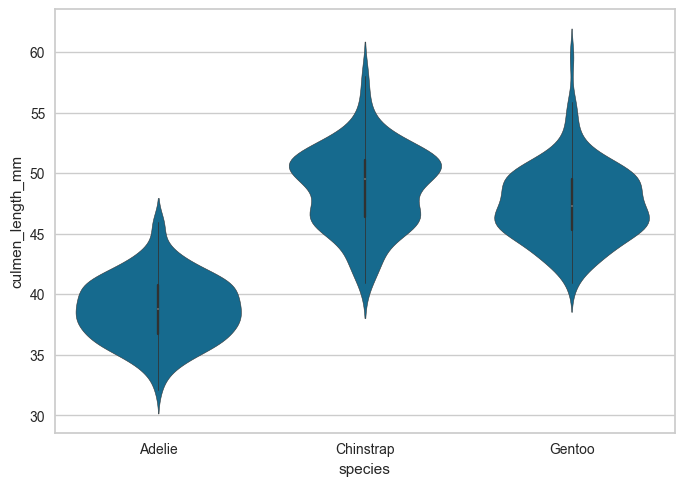

In [23]:
sns.violinplot(data=df, x=species, y=culmen_length_mm)

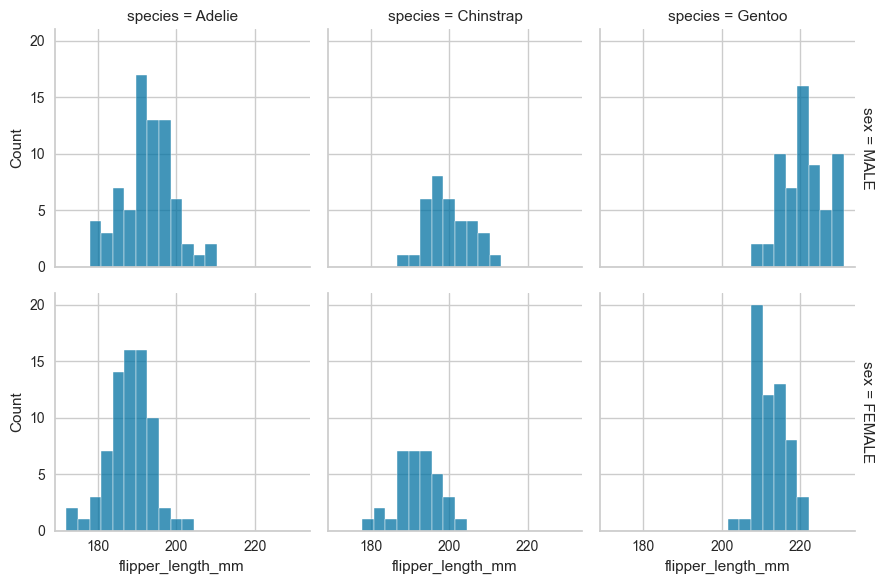

In [14]:
sns.displot(x=flipper_length_mm, col=species, row=sex, binwidth=3, height=3, facet_kws=dict(margin_titles=True),)

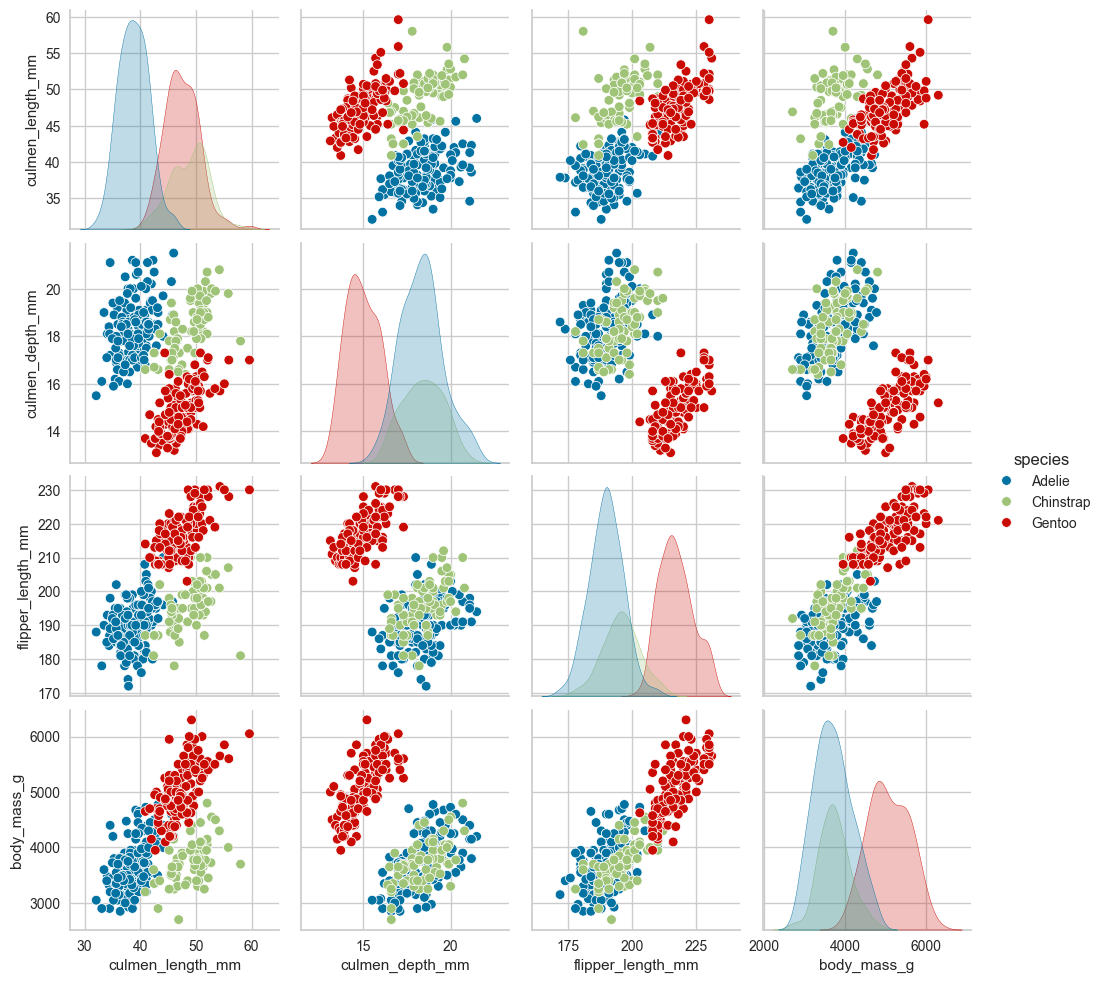

In [15]:
sns.pairplot(df, hue = 'species')

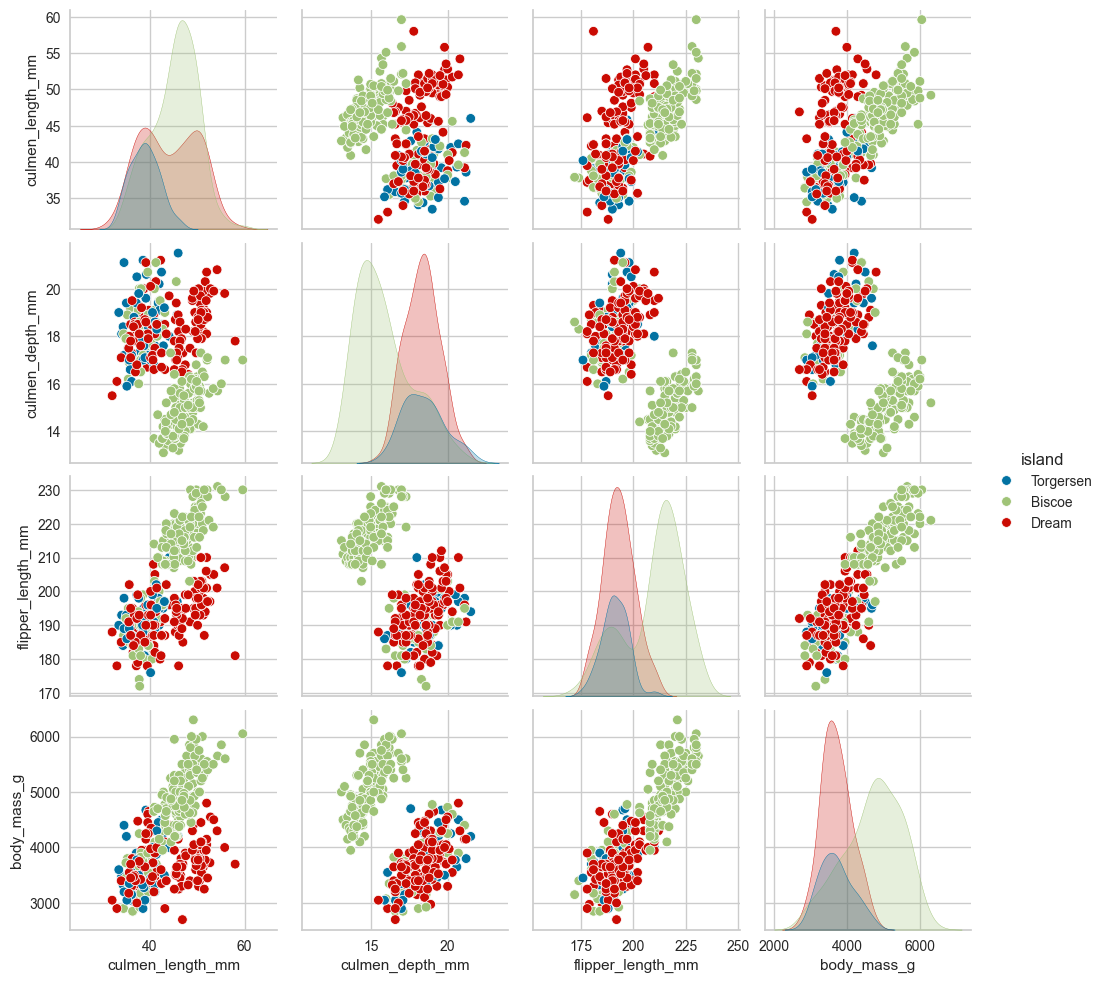

In [17]:
sns.pairplot(df, hue = 'island')

Clustering Kmeans

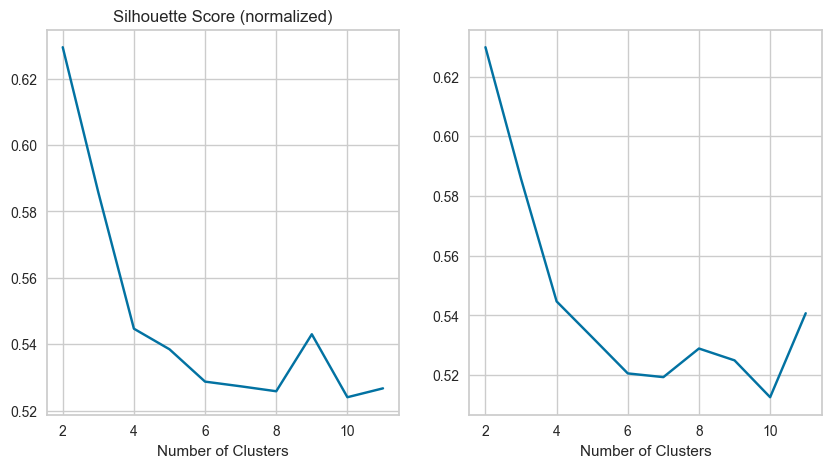

In [18]:
from sklearn.metrics import silhouette_score, silhouette_samples
df = df.loc[:, ['culmen_length_mm', 'culmen_depth_mm', 'body_mass_g']]
sil = [] #silhoeute

np.any(np.isnan(df))
# np.all(np.isfinite(df))
#
df.dropna(inplace=True)

for i in range(2, 12):
    km = KMeans(n_clusters=i)
    km = km.fit(df)
    sil.append(silhouette_score(df, km.labels_))

silNorm = []
for i in range(2, 12):
    km = KMeans(n_clusters=i)
    km = km.fit(df)
    silNorm.append(silhouette_score(df, km.labels_))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(range(2,12), sil)
ax1.set_title('Silhouette Score')
ax1.set_xlabel('Number of Clusters')

ax2.plot(range(2,12), silNorm)
ax1.set_title('Silhouette Score (normalized)')
ax2.set_xlabel('Number of Clusters')

plt.show()

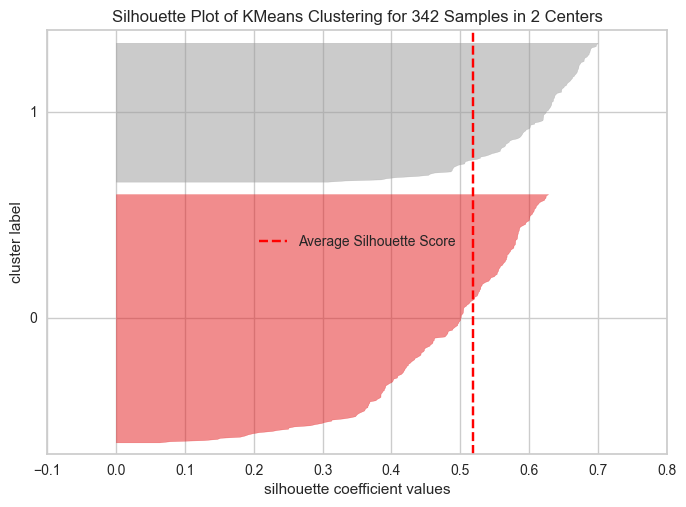

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 342 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=2, random_state=42))

In [29]:
x = df.values
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
#print(kmeans.cluster_center_)
silhouette_visualizer(KMeans(2, random_state=42), x)